In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def drawData(c1=None, c2=None):
    for i in range(len(c1)):
        plt.plot(c1[i][1], c1[i][2], 'bo')

    for i in range(len(c2)):
        plt.plot(c2[i][1], c2[i][2], 'rx')


def drawLine(w=None, col=None):
    x = np.arange(-10, 10 + 0.1, 10)
    # y = -w[0][0] / w[0][2] - w[0][1] / w[0][2] * x
    y = -w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, col)


def drawDataHyperplane(x_c1=None, x_c2=None, w=None, col=None):
    drawData(x_c1, x_c2)
    drawLine(w, col)
    # plt.show()

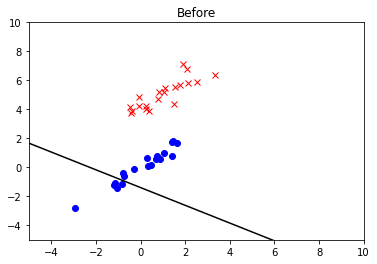

In [3]:
n_sample = 20

x_c1 = pd.read_csv('x_c1.csv', header=None)
x_c2 = pd.read_csv('x_c2.csv', header=None)

# shape (20, 3)
x_c1 = np.hstack((np.ones((n_sample, 1)), x_c1.to_numpy()))
x_c2 = np.hstack((np.ones((n_sample, 1)), x_c2.to_numpy()))

# shape (20, 1)
y1 = np.ones((n_sample, 1)) * -1
y2 = np.ones((n_sample, 1))

# shape (40, 3)
X = np.vstack((x_c1, x_c2))

# shape (40, 1)
Y = np.vstack((y1, y2))

# how many iterations to train for
n_epoch = 300

# learning rate
eta = 0.001

# shape (1, 3)
# w = np.random.rand(1, 3)  # [b, w1, w2]
w = np.random.rand(len(X[0]))

# draw initial line
plt.figure()
plt.title('Before')
plt.xlim(- 5, 10)
plt.ylim(- 5, 10)
drawDataHyperplane(x_c1, x_c2, w, 'k')
plt.show()

In [4]:
def svm(Y, X, w, epoch, eta):
    # shape (40, 3)
    yx = np.multiply(np.tile(Y, (1, 3)), X)  # yx

    lamda = 0.01

    # draw svm
    plt.figure()
    plt.title('After')
    plt.xlim(- 5, 10)
    plt.ylim(- 5, 10)

    for e in range(1, epoch + 1):
        err1 = 0
        err2 = 0
        for i, _ in enumerate(yx):
            wyx = np.dot(w, yx[i])
            if wyx < 1:
                err1 += 1
                err2 += wyx
                w = w + eta * (yx[i] - 2 * lamda * w * (n_sample * 2))

        drawDataHyperplane(x_c1, x_c2, w, 'k')
        print(f'err{e}= {err1} {err2:.6f}, w= {w[0]:.6f} {w[1]:.6f} {w[2]:.6f},'
              f' |w|={math.sqrt(w.sum()**2):.6f}, |w23|={math.sqrt(np.power(w,2).sum()):.6f}')

    plt.title('After')
    drawDataHyperplane(x_c1, x_c2, w, 'k')
    plt.show()

err1= 20 -9.045063, w= 0.390563 0.178059 0.292119, |w|=0.860741, |w23|=0.519209
err2= 20 -8.497507, w= 0.364512 0.173279 0.285709, |w|=0.823500, |w23|=0.494494
err3= 20 -7.958645, w= 0.338875 0.168575 0.279400, |w|=0.786850, |w23|=0.470445
err4= 20 -7.428340, w= 0.313646 0.163945 0.273192, |w|=0.750783, |w23|=0.447086
err5= 20 -6.906456, w= 0.288817 0.159390 0.267082, |w|=0.715288, |w23|=0.424444
err6= 20 -6.392858, w= 0.264382 0.154906 0.261069, |w|=0.680357, |w23|=0.402555
err7= 20 -5.887416, w= 0.240335 0.150494 0.255152, |w|=0.645981, |w23|=0.381460
err8= 20 -5.390000, w= 0.216670 0.146152 0.249328, |w|=0.612150, |w23|=0.361207
err9= 20 -4.900483, w= 0.193381 0.141879 0.243597, |w|=0.578857, |w23|=0.341856
err10= 20 -4.418738, w= 0.170461 0.137673 0.237957, |w|=0.546092, |w23|=0.323473
err11= 21 -2.982195, w= 0.148787 0.133006 0.235968, |w|=0.517761, |w23|=0.309046
err12= 22 -1.575330, w= 0.128373 0.127911 0.237732, |w|=0.494016, |w23|=0.298927
err13= 22 -1.185706, w= 0.108315 0.12

err111= 21 13.635133, w= -0.684894 -0.187275 0.434671, |w|=0.437498, |w23|=0.832521
err112= 21 13.679083, w= -0.686322 -0.189223 0.436365, |w|=0.439180, |w23|=0.835020
err113= 20 12.702107, w= -0.689277 -0.190870 0.434631, |w|=0.445517, |w23|=0.836922
err114= 21 13.754051, w= -0.690632 -0.192758 0.436326, |w|=0.447065, |w23|=0.839350
err115= 20 12.778739, w= -0.693519 -0.194349 0.434592, |w|=0.453277, |w23|=0.841196
err116= 21 13.826599, w= -0.694803 -0.196179 0.436287, |w|=0.454695, |w23|=0.843555
err117= 21 13.867358, w= -0.696066 -0.197979 0.437954, |w|=0.456090, |w23|=0.845877
err118= 20 12.887321, w= -0.698866 -0.199487 0.436195, |w|=0.462159, |w23|=0.847629
err119= 21 13.936248, w= -0.700061 -0.201231 0.437864, |w|=0.463429, |w23|=0.849885
err120= 20 12.957974, w= -0.702799 -0.202688 0.436105, |w|=0.469381, |w23|=0.851584
err121= 21 14.002915, w= -0.703928 -0.204379 0.437776, |w|=0.470531, |w23|=0.853776
err122= 21 14.040735, w= -0.705039 -0.206042 0.439418, |w|=0.471662, |w23|=0

err220= 21 15.671652, w= -0.787507 -0.277363 0.455024, |w|=0.609846, |w23|=0.950865
err221= 19 13.615496, w= -0.788492 -0.279024 0.452143, |w|=0.615373, |w23|=0.950793
err222= 21 15.677898, w= -0.788193 -0.278763 0.454038, |w|=0.612918, |w23|=0.951371
err223= 20 14.634270, w= -0.789531 -0.278988 0.452023, |w|=0.616496, |w23|=0.951587
err224= 21 15.690099, w= -0.789215 -0.278728 0.453920, |w|=0.614022, |w23|=0.952152
err225= 20 14.692392, w= -0.788541 -0.279885 0.454935, |w|=0.613492, |w23|=0.952417
err226= 20 14.648906, w= -0.789873 -0.280093 0.452905, |w|=0.617061, |w23|=0.952615
err227= 21 15.707569, w= -0.789551 -0.279814 0.454788, |w|=0.614578, |w23|=0.953163
err228= 19 13.655656, w= -0.790505 -0.281438 0.451910, |w|=0.620033, |w23|=0.953063
err229= 21 15.712684, w= -0.790173 -0.281137 0.453809, |w|=0.617501, |w23|=0.953600
err230= 21 15.724401, w= -0.789846 -0.280841 0.455677, |w|=0.615010, |w23|=0.954133
err231= 19 13.668917, w= -0.790795 -0.282450 0.452785, |w|=0.620460, |w23|=0

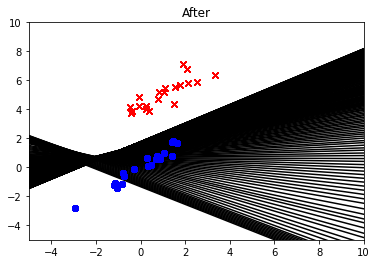

In [5]:
svm(Y, X, w, n_epoch, eta)